In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [13]:
bad_loci = []
loci = open('Similarity_Text.txt').readline()

for name in loci.split():
    name = name.replace('...','')
    bad_loci.append(name)

print bad_loci


['Ashanti', '2zxq', 'B7GRY', 'D6ZU2', 'Q8G62', 'F9XZP5', 'I3WK73', 'D9R6V', 'Q024H', 'W5X5T', 'H6NCQ', 'C0Z6B', 'C3AVD', 'C2W75', 'C3AKL', 'C2QAW', 'C3L5M', 'Q81RR', 'Q63CI6', 'C2YQI0', 'C2XSW', 'C2Z6Q', 'K0FEG', 'C2S2J1', 'B2TJW8', 'B1HND', 'F9VJD7', 'K8E6T', 'F7YT62', 'Q7MCR', 'Q9KMR', 'B7VSN', 'I2BPP5', 'Q2SB8', 'V6KVU', 'G2PGA', 'K0ENQ', 'W5WMI', 'A2FDT', 'G0L00', 'F0RBZ2', 'F3ZV98', 'H6NFV', 'Q833X', 'I3WG3', 'Q8G71', 'W5W3Z', 'C2S2Q', 'S0EXX9']


In [14]:
good_loci = []

with open('HMMR_Alignment.fasta') as f:
    # 'with' creates a block kind of like defining a fucntion that allows a document to be opened as a file handle
    # object; closing a file handle is important, because opening a file handle more than once can cause issues 
    # --think about when you open a word doc more than once--
    for line in f:
        if line[0] == '>':
            good_loci.append(line[1:].strip()) # '.strip()' removes whitespace from STRINGS only
            
print good_loci 
            

['Ashanti_Glyco', '2zxq', 'B7GRY0_BIFLS', 'D6ZU29_BIFLJ', 'Q8G622_BIFLO', 'F9XZP5_BIFBU', 'I3WK73_BIFBI', 'D9R6V4_CLOSW', 'Q024H3_SOLUE', 'W5X5T4_9BACT', 'H6NCQ7_9BACL', 'C0Z6B5_BREBN', 'C3AVD4_BACMY', 'C2W753_BACCE', 'C3AKL9_BACMY', 'C2QAW6_BACCE', 'C3L5M0_BACAC', 'Q81RR8_BACAN', 'Q63CI6_BACCZ', 'C2YQI0_BACCE', 'C2XSW2_BACCE', 'C2Z6Q8_BACCE', 'K0FEG5_BACTU', 'C2S2J1_BACCE', 'B2TJW8_CLOBB', 'B1HND6_LYSSC', 'F9VJD7_ARTSS', 'K8E6T3_CARML', 'F7YT62_VIBA7', 'Q7MCR2_VIBVY', 'Q9KMR6_VIBCH', 'B7VSN0_VIBSL', 'I2BPP5_PSEFL', 'Q2SB82_HAHCH', 'V6KVU1_STRRC', 'G2PGA1_STRVO', 'K0ENQ5_9NOCA', 'W5WMI2_9PSEU', 'A2FDT7_TRIVA', 'G0L004_ZOBGA', 'F0RBZ2_CELLC', 'F3ZV98_MAHA5', 'H6NFV0_9BACL', 'Q833X5_ENTFA', 'I3WG31_BIFBI', 'Q8G712_BIFLO', 'W5W3Z8_9PSEU', 'C2S2Q8_BACCE', 'S0EXX9_9BACT']


In [15]:
import re

identities = []
n = 0

valid = re.compile(r"^[0-9]")
with open('Similarity_Text.txt') as f:
    for line in f:
        if valid.match(line):
            line = line.replace('%','').strip().split()
            line.insert(n,'100')
            line = ','.join(line)
            identities.append(line)
            n = n + 1
f = open('Identities.csv','w')

f.write( 'p,' + ','.join(good_loci) + '\n' )

for a in zip(good_loci,identities):
    f.write(','.join(a)+'\n')

f.close()    

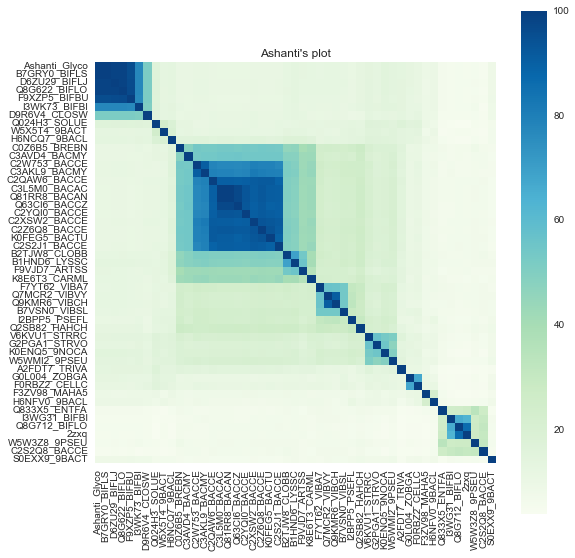

In [54]:
import pandas
import seaborn

figure(figsize=(9,9))
good_loci.remove('2zxq')
good_loci.insert( -3, '2zxq' )

df = pandas.read_csv('Identities.csv', index_col = 'p')
df = df[good_loci]
df = df.T[good_loci]

seaborn.heatmap(df, square = True, cmap = 'GnBu')



ylabel('')
xlabel('')
title('Ashanti\'s plot')

In [3]:
good_loci

NameError: name 'good_loci' is not defined